In [1]:
# numpy for math calculation
# pandas for loading the csv file
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load the csv file
df = pd.read_csv('data.csv')

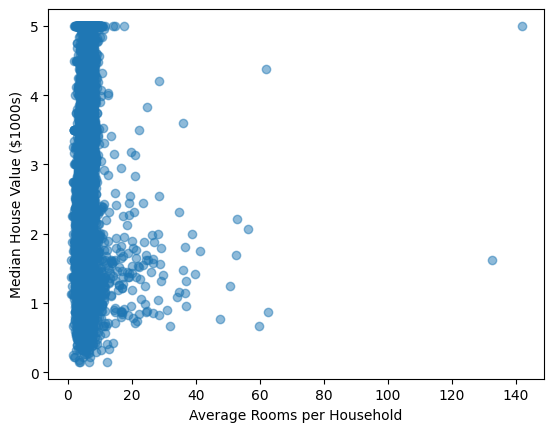

In [3]:
# extract x and y, convert them into numpy array
# .value is for converting pandas series to numpy 1d array
x = df['AveRooms'].values
y = df['MedHouseVal'].values
plt.scatter(x, y, alpha=0.5, label='Data')
plt.xlabel("Average Rooms per Household")
plt.ylabel("Median House Value ($1000s)")
plt.show()

In [4]:
# reshape to 2d array
# -1 means automatically calculate the row number
x = x.reshape (-1, 1)
print(x.shape, y.shape)

(20640, 1) (20640,)


In [5]:
# initialize the parameters
# The normal distribution is used because initializing 
# the parameters around 0 can 
# help the model start symmetrically 
# and improve training stability when there are multiple features.
# When initializing model parameters, using random values (like np.random.randn)
# is important to break symmetry—if all weights start with the same value 
# (e.g., 0), they will receive identical gradients during training, learn the 
# same thing, and fail to converge. This is known as the symmetry breaking 
# problem. Additionally, using 0.0 instead of 0 ensures that all computations 
# are performed in floating-point precision, which avoids issues like integer 
# division and implicit type promotion. Floating-point operations are essential 
# for stable and accurate optimization in machine learning models.
w = np.random.randn()
b = 0.0

In [6]:
lr = 0.01 # learning rate
epochs = 1000 # the number of iterations

In [7]:
# start the loop
for epoch in range(epochs):
    y_pred = x*w + b # element wise broadcasting
    loss = np.mean((y_pred.flatten()-y)**2) #calculating the Mean Squared Error MSE
    if epoch % 100 == 0:
        print(f"Epoch{epoch}: Loss = {loss:.4f}")
    dw = np.mean(2 * x * (y_pred.flatten()-y)) #defining dw
    db = np.mean(2 * (y_pred.flatten() - y)) #defining db
    w = w - lr * dw
    b = b - lr * db # Gradient descent


Epoch0: Loss = 19.2070
Epoch100: Loss = 1.7996
Epoch200: Loss = 1.7996
Epoch300: Loss = 1.7996
Epoch400: Loss = 1.7996
Epoch500: Loss = 1.7996
Epoch600: Loss = 1.7996
Epoch700: Loss = 1.7996
Epoch800: Loss = 1.7996
Epoch900: Loss = 1.7996


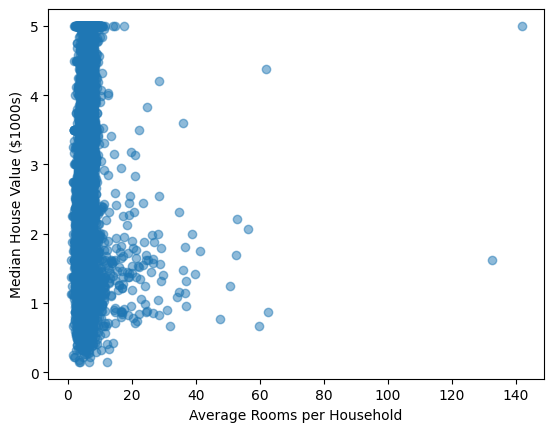

In [8]:
plt.scatter(x, y, alpha=0.5, label='Data')
plt.xlabel("Average Rooms per Household")
plt.ylabel("Median House Value ($1000s)")
plt.show()

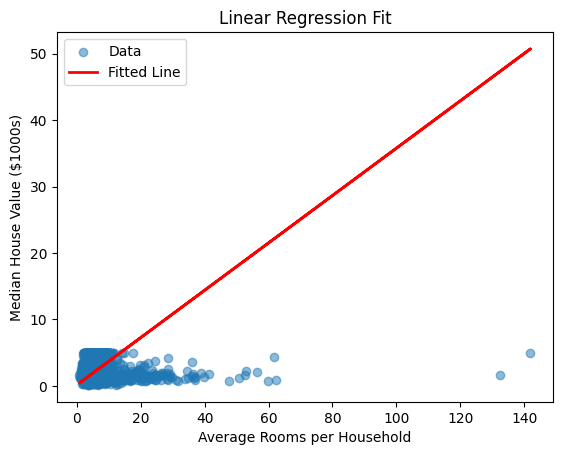

In [9]:


# Original Scatter plot
plt.scatter(x, y, alpha=0.5, label='Data')

# fit the straight line
y_fit = x * w + b
plt.plot(x, y_fit, color='red', linewidth=2, label='Fitted Line')

plt.xlabel("Average Rooms per Household")
plt.ylabel("Median House Value ($1000s)")
plt.title("Linear Regression Fit")
plt.legend()
plt.show()
